In [76]:
# Visualizations lib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 

import pandas as pd
import numpy as np
pd.options.display.max_rows = 100
# models
from sklearn.impute import KNNImputer 
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, TheilSenRegressor

import warnings
warnings.filterwarnings('ignore')
# from jupyterthemes import jtplot
# jtplot.style()

In [77]:
df = pd.read_csv('car24_Delhi_records.csv')
data = pd.DataFrame()

In [78]:
df

,Unnamed: 0,Kilometers,cars_model,Year,Owner_Type,Insurance_Date,Insurance_Type,RTO,Fuel_Type,Transmission_Type,Price
0,0,"50,007 km",2014 Tata Nano XT TWIST,December 2014,First Owner,22/2/2021,Comp,DL11,Petrol,MANUAL,"₹ 114,899"
1,1,"19,577 km",2016 Maruti Celerio ZXI OPT AMT,April 2016,First Owner,10/5/2021,Zero_Dep,DL6C,Petrol,AUTOMATIC,"₹ 368,499"
2,2,"57,650 km",2011 Maruti Wagon R 1.0 LXI CNG,May 2011,Second Owner,20/9/2021,Third_party,DL8C,Petrol + CNG,MANUAL,"₹ 196,199"
3,3,"47,447 km",2010 Hyundai Santro Xing GLS,March 2010,First Owner,27/3/2021,Comp,DL3C,Petrol + CNG,MANUAL,"₹ 156,460"
4,4,"13,337 km",2016 Maruti Alto K10 LXI,May 2016,First Owner,2/11/2021,Expired,DL6C,Petrol,MANUAL,"₹ 293,447"
...,...,...,...,...,...,...,...,...,...,...,...
2373,2373,"4,640 km",2011 Hyundai i20 ASTA 1.2,April 2015,First Owner,28/5/2021,Comprehensive,DL2C,NaN,MANUAL,"₹ 200,000"
2374,2374,"56,245 km",2012 Mahindra XUV500 W8 FWD,April 2010,Second Owner,12/5/2021,Zero_Dep,DL1C,Petrol,MANUAL,"₹ 415,000"
2375,2375,"43,850 km",2019 Jeep Compass 1.4 LIMITED PLUS AT,April 2016,First Owner,1/11/2021,Zero Depreciation,DL10,Diesel,MANUAL,"₹ 1,850,000"
2376,2376,"83,470 km",2013 Maruti Swift VDI,September 2011,First Owner,27/1/2021,NaN,DL2C,NaN,MANUAL,"₹ 280,000"


In [79]:
data1 = [] 
data2 = []
data3 = []
for i in range(0,len(df)):
    model  = df['cars_model'][i][5:-1]
    data1.append(model)
    brand = ' '.join(df['cars_model'][i][5:-1].split()[:1])
    data2.append(brand)
    car_model = ' '.join(df['cars_model'][i][5:-1].split()[1:2])
    data3.append(car_model)

data['Car_model'] = data1
# data['Brand_name'] = data2
#data['Model_name'] = data3

In [80]:
' '.join(df['cars_model'][i][5:-1].split()[1:3])

'i10 MAGNA'

In [81]:
df['cars_model'][1][5:-1].split()[1]

'Celerio'

In [82]:
# ab = df.Year.str.split(" ",n=-1,expand=True)
# ab

In [83]:
df['Year'][1] = df.Year.str.split(" ",n=-1,expand=True)
data['Year'] = df['Year'][1][1]

In [84]:
df['Kilometers'][1] = df.Kilometers.str.split(" ",n=-1,expand=True)
data['Kilometers'] = df['Kilometers'][1][0]
data['Kilometers'] = data['Kilometers'].str.replace(',','')
data["Kilometers"] = pd.to_numeric(data["Kilometers"])

In [85]:
data['Fuel_Type'] = df['Fuel_Type']
data['Owner_Type'] = df['Owner_Type']
data['Insurance_Type'] = df['Insurance_Type']
data['RTO'] = df['RTO']
data['Transmission_Type'] = df['Transmission_Type']

In [86]:
df['Price'][1] = df.Price.str.split(" ", n=-1, expand=True)
data['Price'] = df['Price'][1][1]
data['Price'] = data['Price'].str.replace(',','')
data["Price"] = pd.to_numeric(data["Price"])

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2378 entries, 0 to 2377
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car_model          2378 non-null   object 
 1   Year               2357 non-null   object 
 2   Kilometers         2357 non-null   float64
 3   Fuel_Type          2357 non-null   object 
 4   Owner_Type         2357 non-null   object 
 5   Insurance_Type     2359 non-null   object 
 6   RTO                2378 non-null   object 
 7   Transmission_Type  2225 non-null   object 
 8   Price              2378 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 167.3+ KB


In [88]:
# # data['No. of years'] = data.apply(lambda x:2021-int(x))
# data.drop(['Car_model','Year'],axis=1,inplace=True)

In [89]:
data.head(10)

,Car_model,Year,Kilometers,Fuel_Type,Owner_Type,Insurance_Type,RTO,Transmission_Type,Price
0,Tata Nano XT TWIS,2014,50007.0,Petrol,First Owner,Comp,DL11,MANUAL,114899
1,Maruti Celerio ZXI OPT AM,2016,19577.0,Petrol,First Owner,Zero_Dep,DL6C,AUTOMATIC,368499
2,Maruti Wagon R 1.0 LXI CN,2011,57650.0,Petrol + CNG,Second Owner,Third_party,DL8C,MANUAL,196199
3,Hyundai Santro Xing GL,2010,47447.0,Petrol + CNG,First Owner,Comp,DL3C,MANUAL,156460
4,Maruti Alto K10 LX,2016,13337.0,Petrol,First Owner,Expired,DL6C,MANUAL,293447
5,Maruti Alto K10 LX,2011,32089.0,Petrol,Second Owner,Third_party,DL3C,MANUAL,173699
6,Maruti Alto 800 LX,2013,NaN,Petrol,First Owner,Comp,DL9C,MANUAL,203081
7,Maruti Ritz VDI,NaN,28769.0,Diesel,First Owner,Comp,DL9C,MANUAL,300199
8,Maruti Celerio ZXI AM,2012,16061.0,Petrol,NaN,Comp,DL9C,AUTOMATIC,399804
9,Hyundai i10 MAGNA 1.1 IRDE,2018,18002.0,NaN,Second Owner,Comp,DL2C,MANUAL,172600


In [90]:
# data['Model_name'].nunique()

In [91]:
data.isna().sum()

Car_model              0
Year                  21
Kilometers            21
Fuel_Type             21
Owner_Type            21
Insurance_Type        19
RTO                    0
Transmission_Type    153
Price                  0
dtype: int64

Text(0.5, 1.0, 'Percentage of missing values per feature')

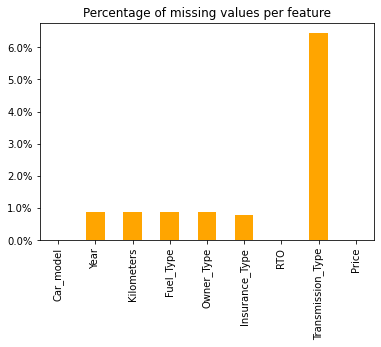

In [92]:
new_data = data.copy()
new_data.isna().sum()
ax = (new_data.isnull().mean() * 100).plot(kind='bar', color ='orange')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Percentage of missing values per feature')

In [93]:
data['Insurance_Type'].unique()

array(['Comp', 'Zero_Dep', 'Third_party', 'Expired', nan,
       'Insurance Expired', 'Comprehensive', 'Zero Depreciation',
       '3rd Party'], dtype=object)

In [94]:
data['Year'].unique()

array(['2014', '2016', '2011', '2010', '2013', nan, '2012', '2018',
       '2017', '2019', '2015', '2008', '2020', '2009', '2007', '2006',
       '2005', '2002'], dtype=object)

In [95]:
data['Fuel_Type'].unique()

array(['Petrol', 'Petrol + CNG', 'Diesel', nan, 'Petrol + LPG',
       'Electric'], dtype=object)

In [96]:
data['Fuel_Type'].value_counts()

Petrol          1435
Diesel           620
Petrol + CNG     299
Petrol + LPG       2
Electric           1
Name: Fuel_Type, dtype: int64

In [97]:
data.loc[data['Fuel_Type']=='Electric','Fuel_Type'] = 'Petrol'

In [98]:
data['Fuel_Type'].unique()

array(['Petrol', 'Petrol + CNG', 'Diesel', nan, 'Petrol + LPG'],
      dtype=object)

In [99]:
# data.loc[data['Fuel_Type']=='Petrol + LPG']

In [100]:
data['Owner_Type'].unique()

array(['First Owner', 'Second Owner', nan, 'Third Owner', 'Fourth Owner',
       'Sixth Owner'], dtype=object)

In [101]:
data['Transmission_Type'].unique()

array(['MANUAL', 'AUTOMATIC', nan], dtype=object)

In [102]:
# fig = plt.figure(figsize=(25, 15))
# cols = 5
# rows = np.ceil(float(data.shape[1]) / cols)

# for i, column in enumerate(data.columns):
#     ax = fig.add_subplot(rows, cols, i + 1)
#     ax.set_title(column)
#     if data.dtypes[column] == np.object:
#         data[column].value_counts().plot(kind="bar", axes=ax)
#     else:
#         data[column].hist(axes=ax)
#         plt.xticks(rotation="vertical")
# plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2378 entries, 0 to 2377
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car_model          2378 non-null   object 
 1   Year               2357 non-null   object 
 2   Kilometers         2357 non-null   float64
 3   Fuel_Type          2357 non-null   object 
 4   Owner_Type         2357 non-null   object 
 5   Insurance_Type     2359 non-null   object 
 6   RTO                2378 non-null   object 
 7   Transmission_Type  2225 non-null   object 
 8   Price              2378 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 167.3+ KB


In [104]:
data.columns

Index(['Car_model', 'Year', 'Kilometers', 'Fuel_Type', 'Owner_Type',
       'Insurance_Type', 'RTO', 'Transmission_Type', 'Price'],
      dtype='object')

In [105]:
# num_v = data[['Kilometers','Price']]
# cat_v = data[['Car_model', 'Year', 'Fuel_Type', 'Owner_Type','Insurance_Type', 'RTO', 'Transmission_Type']]
num_v = data.select_dtypes(['int64','float'])
cat_v = data.select_dtypes(['O'])

In [106]:
imputer = KNNImputer(n_neighbors=2) 
num_v_1 = imputer.fit_transform(num_v) 

In [107]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaler = StandardScaler()

# num_v_1 = scaler.fit_transform(num_v_1)

In [108]:
numerical_df = pd.DataFrame(num_v_1,columns=list(num_v.columns))

In [109]:
numerical_df

,Kilometers,Price
0,50007.0,114899.0
1,19577.0,368499.0
2,57650.0,196199.0
3,47447.0,156460.0
4,13337.0,293447.0
...,...,...
2373,4640.0,200000.0
2374,56245.0,415000.0
2375,43850.0,1850000.0
2376,83470.0,280000.0


In [110]:
# numerical_df['Price'] = np.log10(numerical_df['Price'])
numerical_df['Kilometers'] = np.log10(numerical_df['Kilometers'])

In [111]:
# num_df = numerical_df.astype(int)

In [112]:
# scale_df = scaler.fit_transform(num_df)
# num_df = pd.DataFrame(scale_df,columns=list(num_v.columns))

In [113]:
cat_v['Year'].mode()

0    2012
dtype: object

In [114]:
cat_v['Fuel_Type'].mode()

0    Petrol
dtype: object

In [115]:
cat_v['Owner_Type'].mode()

0    First Owner
dtype: object

In [116]:
cat_v['Insurance_Type'].mode()

0    Comp
dtype: object

In [117]:
cat_v['Transmission_Type'].mode()

0    MANUAL
dtype: object

In [118]:
cat_v["Year"].fillna('2012', inplace = True)  
cat_v["Fuel_Type"].fillna('Petrol', inplace = True)  
cat_v["Owner_Type"].fillna('Fifth Owner', inplace = True)  
cat_v["Insurance_Type"].fillna('Comp', inplace = True) 
cat_v["Transmission_Type"].fillna('MANUAL', inplace = True) 

In [119]:
cat_v.isna().sum()

Car_model            0
Year                 0
Fuel_Type            0
Owner_Type           0
Insurance_Type       0
RTO                  0
Transmission_Type    0
dtype: int64

In [120]:
cat_v['Year'] = cat_v['Year'].astype('int64')
cat_v['Years'] = cat_v['Year'].apply(lambda x:2021-x)
cat_v.drop(['Car_model','Year'],axis=1,inplace=True)

In [121]:
cat_v['RTO']=cat_v['RTO'].apply(lambda x:'Delhi'if x.startswith("DL") else 'Other_State')

In [122]:
cat_v = pd.get_dummies(cat_v, drop_first=True)


In [123]:
cat_v

,Years,Fuel_Type_Petrol,Fuel_Type_Petrol + CNG,Fuel_Type_Petrol + LPG,Owner_Type_First Owner,Owner_Type_Fourth Owner,Owner_Type_Second Owner,Owner_Type_Sixth Owner,Owner_Type_Third Owner,Insurance_Type_Comp,Insurance_Type_Comprehensive,Insurance_Type_Expired,Insurance_Type_Insurance Expired,Insurance_Type_Third_party,Insurance_Type_Zero Depreciation,Insurance_Type_Zero_Dep,RTO_Other_State,Transmission_Type_MANUAL
0,7,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
1,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,10,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,11,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
4,5,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,6,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
2374,11,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
2375,5,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
2376,10,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1


In [124]:
# bn = data['Brand_name'].unique()

In [125]:
# bn

In [126]:
cat_v.columns

Index(['Years', 'Fuel_Type_Petrol', 'Fuel_Type_Petrol + CNG',
       'Fuel_Type_Petrol + LPG', 'Owner_Type_First Owner',
       'Owner_Type_Fourth Owner', 'Owner_Type_Second Owner',
       'Owner_Type_Sixth Owner', 'Owner_Type_Third Owner',
       'Insurance_Type_Comp', 'Insurance_Type_Comprehensive',
       'Insurance_Type_Expired', 'Insurance_Type_Insurance Expired',
       'Insurance_Type_Third_party', 'Insurance_Type_Zero Depreciation',
       'Insurance_Type_Zero_Dep', 'RTO_Other_State',
       'Transmission_Type_MANUAL'],
      dtype='object')

In [127]:
# cat_v[['Brand_name_BMW', 'Brand_name_Chevrolet', 'Brand_name_Datsun',
#        'Brand_name_Fiat', 'Brand_name_Ford', 'Brand_name_Honda',
#        'Brand_name_Hyundai', 'Brand_name_Jeep', 'Brand_name_KIA',
#        'Brand_name_MG', 'Brand_name_Mahindra', 'Brand_name_Maruti',
#        'Brand_name_Mercedes', 'Brand_name_Nissan', 'Brand_name_Renault',
#        'Brand_name_Skoda', 'Brand_name_Ssangyong', 'Brand_name_Tata',
#        'Brand_name_Toyota', 'Brand_name_Volkswagen', 'Brand_name_Volvo']]

In [128]:
d = [cat_v,numerical_df]
final_df = pd.concat(d,join='outer',axis=1)

In [129]:
final_df.head(5)

,Years,Fuel_Type_Petrol,Fuel_Type_Petrol + CNG,Fuel_Type_Petrol + LPG,Owner_Type_First Owner,Owner_Type_Fourth Owner,Owner_Type_Second Owner,Owner_Type_Sixth Owner,Owner_Type_Third Owner,Insurance_Type_Comp,Insurance_Type_Comprehensive,Insurance_Type_Expired,Insurance_Type_Insurance Expired,Insurance_Type_Third_party,Insurance_Type_Zero Depreciation,Insurance_Type_Zero_Dep,RTO_Other_State,Transmission_Type_MANUAL,Kilometers,Price
0,7,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,4.699031,114899.0
1,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,4.291746,368499.0
2,10,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,4.760799,196199.0
3,11,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,4.676209,156460.0
4,5,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,4.125058,293447.0


In [130]:
final_df.columns

Index(['Years', 'Fuel_Type_Petrol', 'Fuel_Type_Petrol + CNG',
       'Fuel_Type_Petrol + LPG', 'Owner_Type_First Owner',
       'Owner_Type_Fourth Owner', 'Owner_Type_Second Owner',
       'Owner_Type_Sixth Owner', 'Owner_Type_Third Owner',
       'Insurance_Type_Comp', 'Insurance_Type_Comprehensive',
       'Insurance_Type_Expired', 'Insurance_Type_Insurance Expired',
       'Insurance_Type_Third_party', 'Insurance_Type_Zero Depreciation',
       'Insurance_Type_Zero_Dep', 'RTO_Other_State',
       'Transmission_Type_MANUAL', 'Kilometers', 'Price'],
      dtype='object')

In [131]:
final_df.columns = [c.replace('+', '') for c in final_df.columns]

In [132]:
final_df.columns = [c.replace('  ', ' ') for c in final_df.columns]

In [133]:
len(final_df.columns)

20

In [134]:
final_df.columns = [c.replace(' ', '_') for c in final_df.columns]

In [135]:
final_df.columns

Index(['Years', 'Fuel_Type_Petrol', 'Fuel_Type_Petrol_CNG',
       'Fuel_Type_Petrol_LPG', 'Owner_Type_First_Owner',
       'Owner_Type_Fourth_Owner', 'Owner_Type_Second_Owner',
       'Owner_Type_Sixth_Owner', 'Owner_Type_Third_Owner',
       'Insurance_Type_Comp', 'Insurance_Type_Comprehensive',
       'Insurance_Type_Expired', 'Insurance_Type_Insurance_Expired',
       'Insurance_Type_Third_party', 'Insurance_Type_Zero_Depreciation',
       'Insurance_Type_Zero_Dep', 'RTO_Other_State',
       'Transmission_Type_MANUAL', 'Kilometers', 'Price'],
      dtype='object')

In [136]:
# import seaborn as sns
# plt.figure(figsize=(10,10))
# sns.heatmap(final_df.corr(),cmap='viridis',annot=True, square=True)

In [137]:
X = final_df.drop(['Price'],1)
y = final_df['Price']

# model_features_importance=ExtraTreesRegressor()
# model_features_importance.fit(X,y)
# print(model_features_importance.feature_importances_)
# ranked_features=pd.Series(model_features_importance.feature_importances_,index=X.columns)
# ranked_features.nlargest(20).plot(kind='barh')

In [138]:
# selected_f = ranked_features.nlargest(55).index
# X1 = final_df[selected_f]

In [139]:
# X1

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [141]:
# selected_f = ranked_features.nlargest(49).index
# X1 = final_df[selected_f]
# X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=43)
model = LinearRegression()
model.fit(X_train, y_train)
ypred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(ypred, y_test, squared=False)
# rmse = np.sqrt(mse)
print('RMSE:',rmse)

RMSE: 193858.21516541246


In [142]:
# from pycaret.regression import *
# exp1 = setup(final_df, target = 'Price')

In [143]:
# compare_models()

In [144]:
# save the model to disk
import pickle
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))

# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

In [145]:
# pip install -U scikit-learn


In [146]:
import sklearn
sklearn.__version__ 

'0.24.1'

In [147]:
max(y)

2100000.0

In [148]:
min(y)

23000.0

In [149]:
ypred

array([306801.34942031, 382825.35275788, 320194.76864009, 287223.95791892,
       340666.64719064, 326222.01621909, 348910.61034152, 372592.36600475,
       364485.05920689, 405846.45712995, 354885.83529735, 365522.83874366,
       286428.60735833, 330718.01813982, 310799.84541101, 324962.54714594,
       332271.4210181 , 325978.91161554, 309337.19701436, 356732.30233546,
       378309.78199678, 347551.63483846, 356267.97907923, 331942.0203911 ,
       376442.09341654, 329062.95843155, 328807.74963395, 315988.79236462,
       306004.57479341, 399160.80990759, 349868.71986782, 314344.28140232,
       358371.25493117, 292519.57691055, 356943.98363882, 357480.0560746 ,
       344091.7543542 , 317612.67709937, 351115.57964443, 322763.48677396,
       307271.14847582, 393997.28429597, 360979.1293485 , 335299.96699964,
       322870.60458332, 342679.83574029, 296212.52908783, 348145.3095046 ,
       387973.33166997, 342807.52075252, 304878.3602642 , 332495.64812253,
       284408.71316253, 3